# Merge annotated labels
In this notebook we demonstrate how a label-image can be post-processed by annotating labels that should be merged.

In [1]:
import apoc
from skimage.io import imread, imshow, imsave
import pyclesperanto_prototype as cle
import numpy as np
import stackview

Our starting point is an oversegmented (synthetic) label image.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
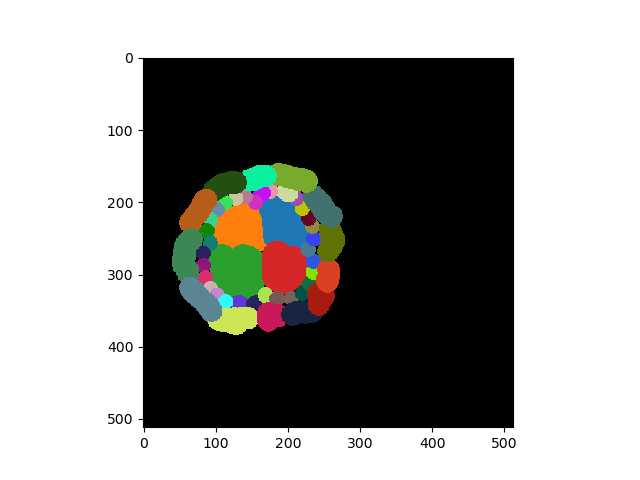

In [2]:
oversegmented = cle.asarray(imread('../../data/syntetic_cells.tif')).astype(np.uint32)
oversegmented

Furthermore, we need an annotation where pixel-intensity = 1 implies that labels should be merged.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
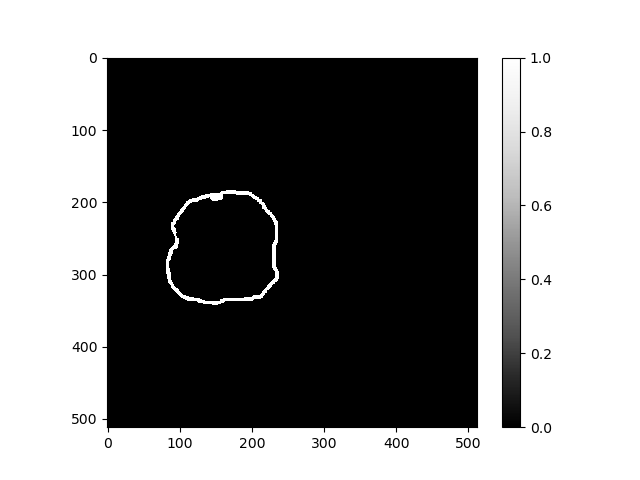
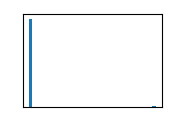

In [3]:
annotation = cle.asarray(imread('../../data/syntetic_cells_merge_annotation.tif')).astype(np.uint32)

# binarize the image
annotation = annotation == 1

annotation

For visualization purposes, we overlay both.

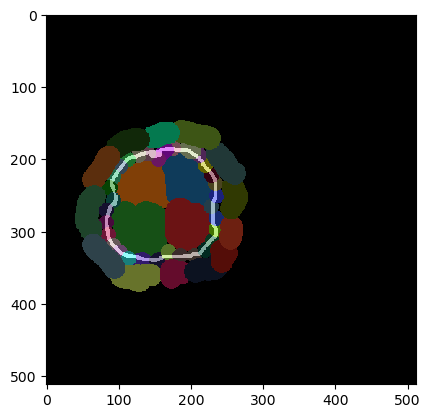

In [4]:
cle.imshow(oversegmented, labels=True, continue_drawing=True)
cle.imshow(annotation, alpha=0.5)

We can now merge all cells whose borders are annotated.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
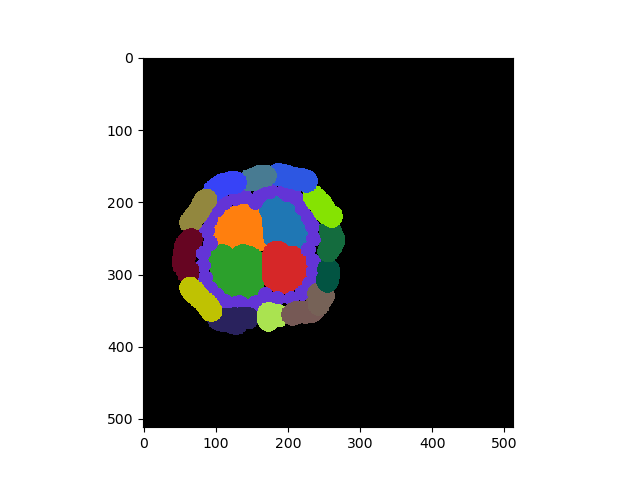

In [5]:
result = cle.merge_annotated_touching_labels(oversegmented, annotation)
result

## How does it work?
Under the hood, there is a function for generating a touch-matrix from the label image and the annotation and a function for merging labels according to a touch-matrix.

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
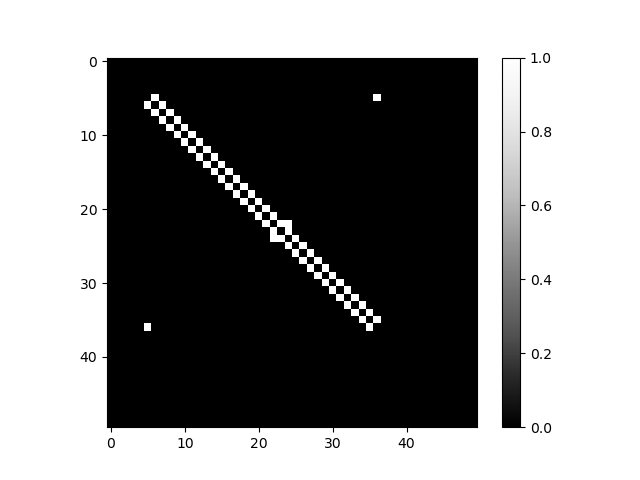
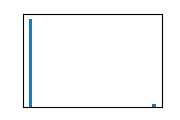

In [6]:
should_touch_matrix = cle.generate_should_touch_matrix(oversegmented, annotation)
should_touch_matrix

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
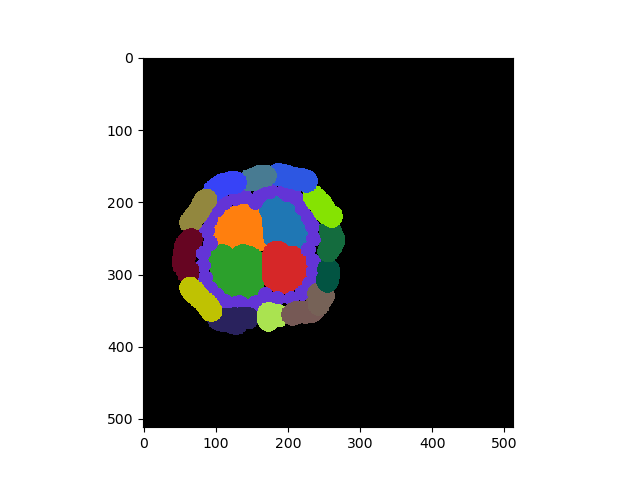

In [7]:
result = cle.merge_labels_according_to_touch_matrix(oversegmented, should_touch_matrix)
result